#230968078 Ishan Suryawanshi Week1 Bodyfat Dataset

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
x = df.drop('BodyFat', axis=1)

In [6]:
y = df['BodyFat']

In [7]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [8]:
x.shape

(252, 14)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

In [27]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(14,)),
    Dense(16, activation='relu'),
    Dense(1)
])

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [30]:
history = model.fit(x_train, x_train, validation_split=0.1, verbose=1, epochs=20, batch_size=32)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.5115 - mean_absolute_error: 1.4102 - val_loss: 1.3426 - val_mean_absolute_error: 0.9154
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.9775 - mean_absolute_error: 1.0926 - val_loss: 1.0180 - val_mean_absolute_error: 0.7941
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.8581 - mean_absolute_error: 1.0253 - val_loss: 0.7849 - val_mean_absolute_error: 0.7000
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1873 - mean_absolute_error: 0.8409 - val_loss: 0.6414 - val_mean_absolute_error: 0.6288
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8790 - mean_absolute_error: 0.7101 - val_loss: 0.5559 - val_mean_absolute_error: 0.5762
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6782 - mean_absolute_error: 0.6185 - val_loss: 0.5075 - val_mean_absolute_error: 0.5373
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6512 - mean_absolute_error: 0.5839 - val_loss: 0.4893 - val

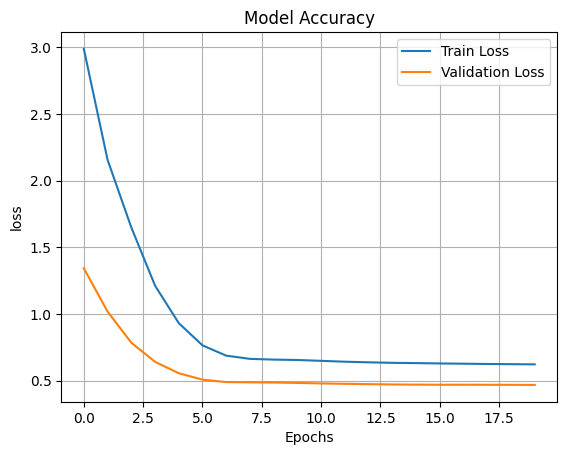

In [31]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
loss, mae = model.evaluate(x_test, y_test)
print(loss, mae)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6287 - mean_absolute_error: 0.6594 
0.5975556373596191 0.6395519375801086
